In [1]:
from src.data import CICIDS2017
from src.models import TabNetModel, TabPFNModel
from src.models import PreConfigured_LogisticRegression, PreConfigured_RandomForest, PreConfigured_LinearSVC, PreConfigured_DecisionTree, PreConfigured_KNeighbors
from src.pipelines import TTPipeline, plot_accuracies
from src.data.utils import balanced_sample

import logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

### Data

In [2]:
dataset = CICIDS2017(pca=True, classes_mapping=True)
dataset.load()
dataset.balance_(n=20000, category_col="Label")
train, test = dataset.train_test_split(test_size=0.3)
X_train = train.drop(columns=["Label"]).values
y_train = train["Label"].values
X_test = test.drop(columns=["Label"]).values
y_test = test["Label"].values

2025-04-07 01:15:20,209 - INFO - Loading dataset...


In [3]:
train["Label"].value_counts()

Label
BENIGN          14072
DDoS            14007
DoS             14001
Port Scan       13930
Brute Force      6441
Web Attack       1447
Bot              1369
Infiltration       29
Heartbleed         10
Name: count, dtype: int64

In [4]:
test["Label"].value_counts()

Label
Port Scan       6070
DoS             5999
DDoS            5993
BENIGN          5928
Brute Force     2711
Web Attack       696
Bot              584
Infiltration       7
Heartbleed         1
Name: count, dtype: int64

### Models

#### Preparing

In [5]:
logreg = PreConfigured_LogisticRegression()
svc = PreConfigured_LinearSVC()
randomforest = PreConfigured_RandomForest()
kneighbors = PreConfigured_KNeighbors()
decision_tree = PreConfigured_DecisionTree()
tabnet = TabNetModel(pretrain=True)
tabpfn = TabPFNModel()

c:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


#### Training

c:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
2025-04-06 22:17:07,440 - INFO - Cross-validation scores: [0.94036135 0.94563969 0.94257714 0.94257714 0.94066304]
2025-04-06 22:17:07,442 - INFO - Mean cross-validation score: 0.9424
2025-04-06 22:17:07,573 - INFO - Model saved to models\ml\logistic_regression.zip


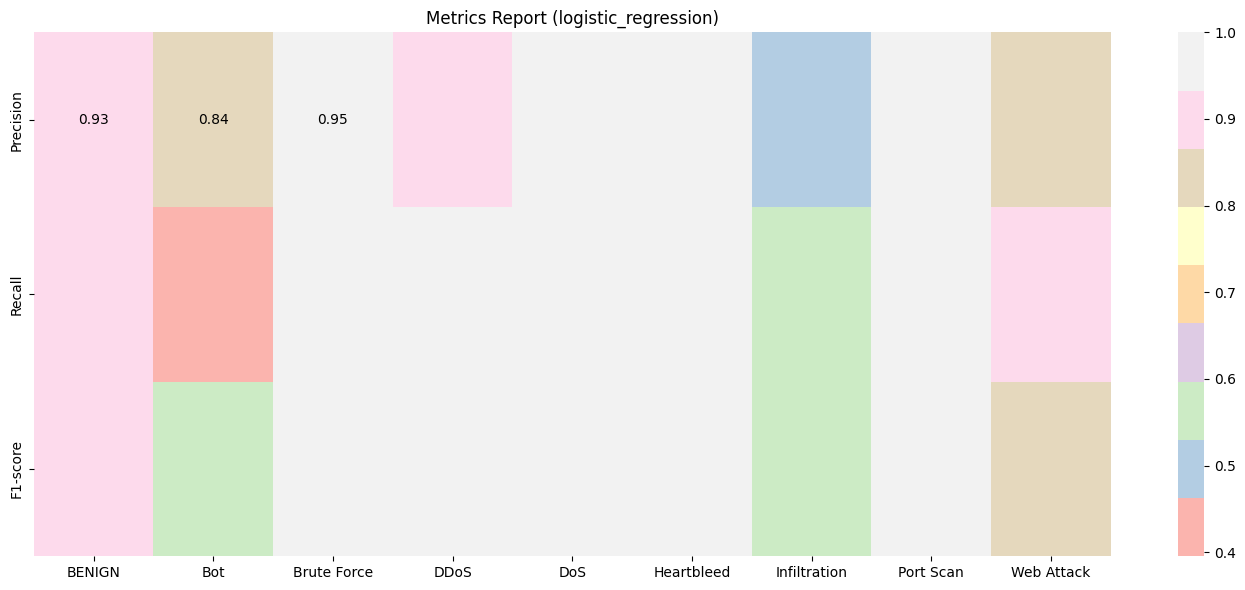

In [6]:
logreg_pl = TTPipeline(logreg)
logreg_pl.train(X_train, y_train, cv=5)
logreg_results = logreg_pl.evaluate(X_test, y_test)
logreg.save()

c:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
2025-04-06 22:20:07,108 - INFO - Cross-validation scores: [0.93438983 0.93415512 0.9365286  0.93423168 0.93484419]
2025-04-06 22:20:07,108 - INFO - Mean cross-validation score: 0.9348
2025-04-06 22:20:07,229 - INFO - Model saved to models\ml\svc.zip


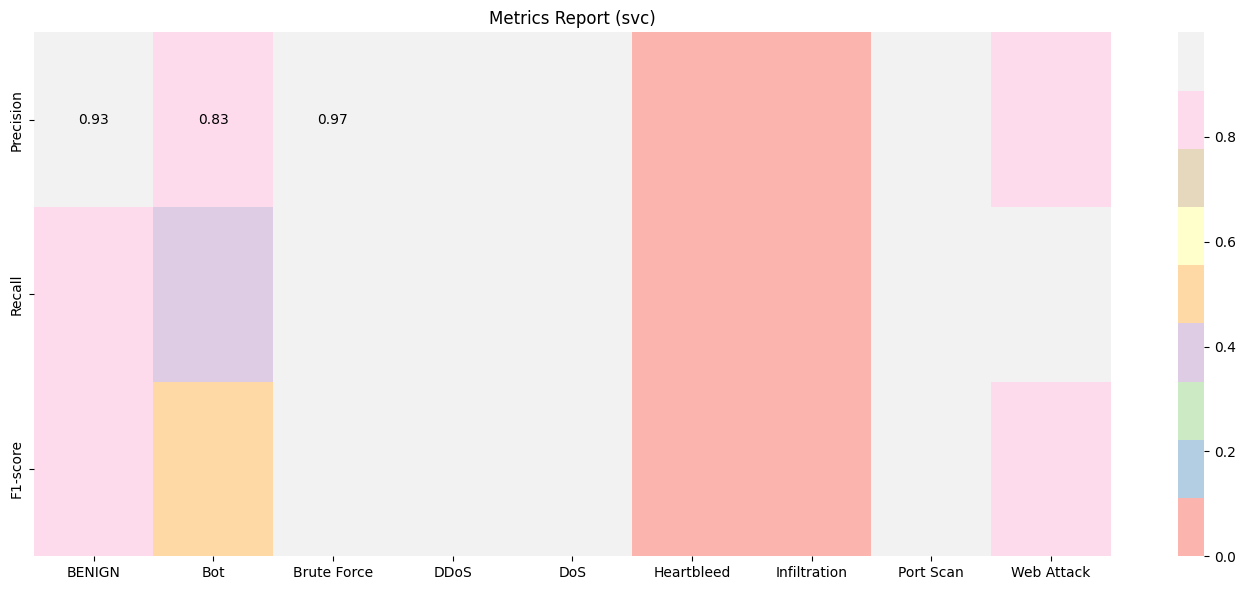

In [7]:
svc_pl = TTPipeline(svc)
svc_pl.train(X_train, y_train, cv=5)
svc_results = svc_pl.evaluate(X_test, y_test)
svc.save()

2025-04-06 22:20:26,938 - INFO - Cross-validation scores: [0.98369316 0.98315596 0.98208407 0.98468724 0.98239032]
2025-04-06 22:20:26,939 - INFO - Mean cross-validation score: 0.9832
2025-04-06 22:20:27,082 - INFO - Model saved to models\ml\random_forest.zip


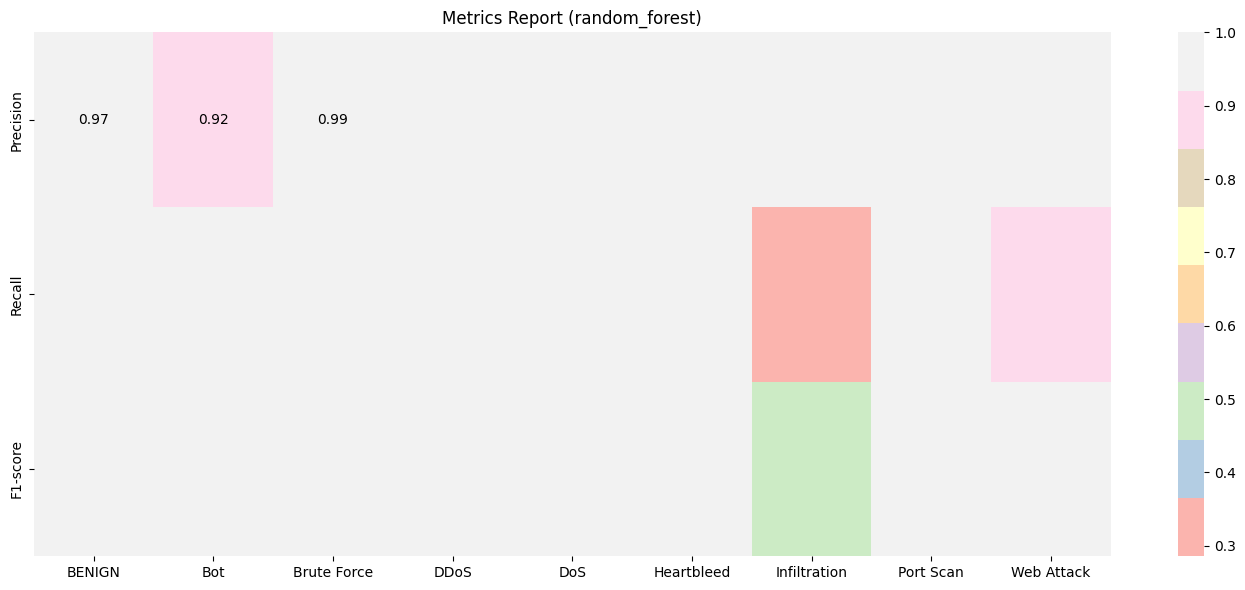

In [8]:
randomforest_pl = TTPipeline(randomforest)
randomforest_pl.train(X_train, y_train, cv=5)
randomforest_results = randomforest_pl.evaluate(X_test, y_test)
randomforest.save()

2025-04-06 22:20:29,536 - INFO - Cross-validation scores: [0.98346348 0.98537631 0.98468724 0.98591226 0.98445755]
2025-04-06 22:20:29,537 - INFO - Mean cross-validation score: 0.9848
c:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] El sistema no puede encontrar el archivo especificado
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^

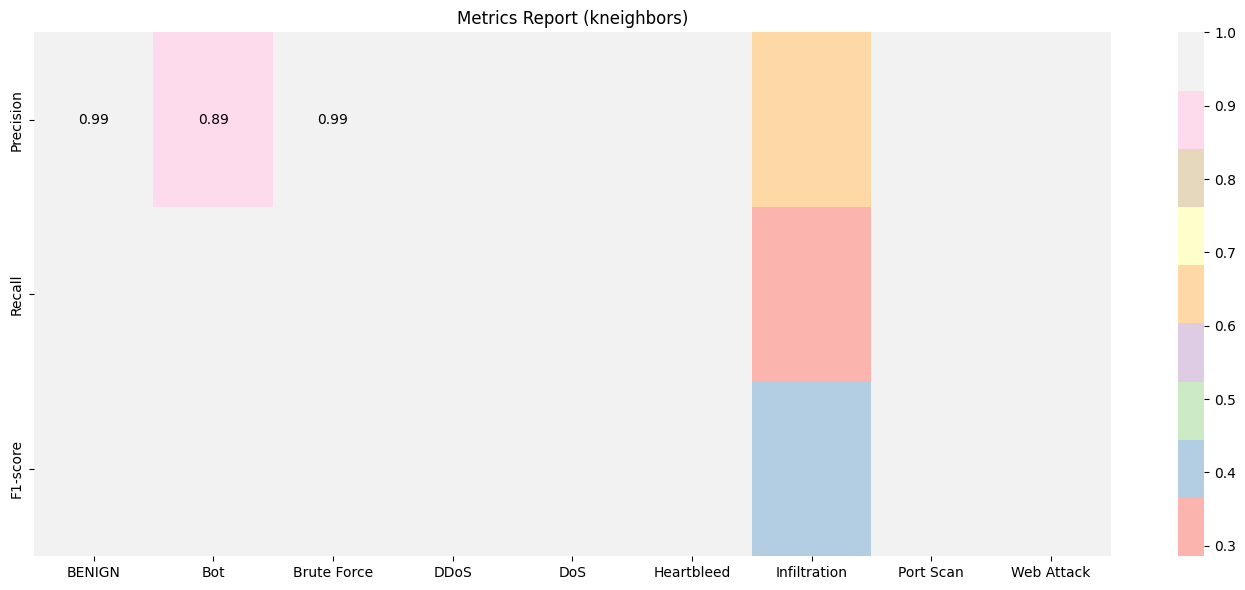

In [9]:
kneighbors_pl = TTPipeline(kneighbors)
kneighbors_pl.train(X_train, y_train, cv=5)
kneighbors_results = kneighbors_pl.evaluate(X_test, y_test)
kneighbors.save()

2025-04-06 22:20:35,402 - INFO - Cross-validation scores: [0.97810443 0.97526989 0.97641834 0.98101217 0.97856213]
2025-04-06 22:20:35,402 - INFO - Mean cross-validation score: 0.9779
2025-04-06 22:20:35,529 - INFO - Model saved to models\ml\decision_tree.zip


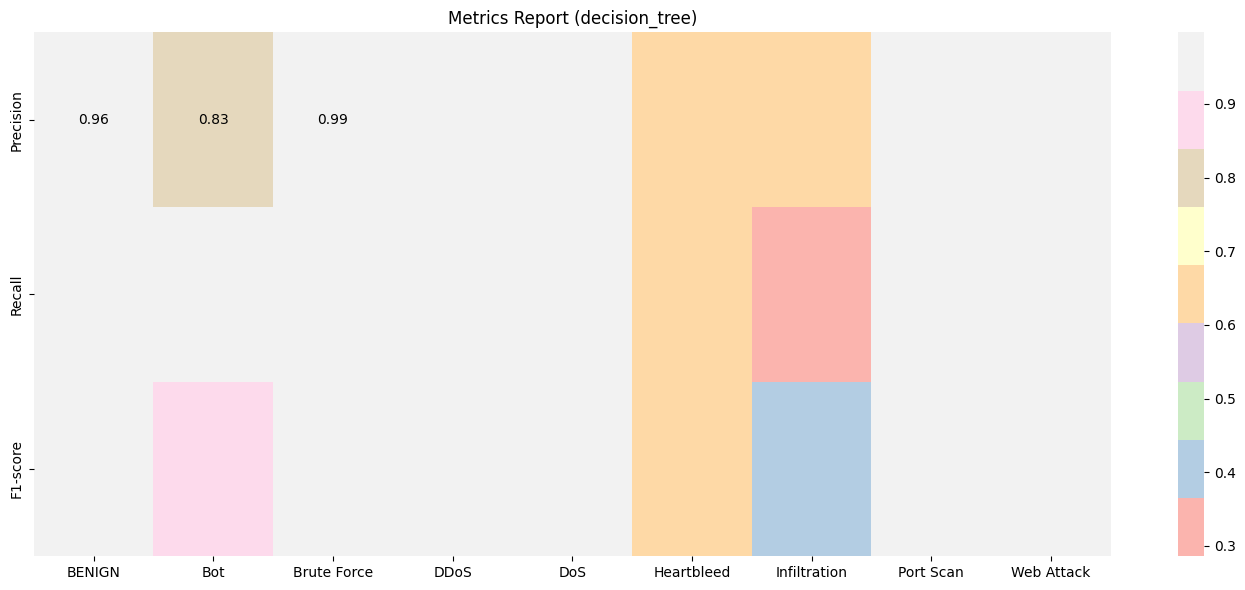

In [10]:
decision_tree_pl = TTPipeline(decision_tree)
decision_tree_pl.train(X_train, y_train, cv=5)
decision_tree_results = decision_tree_pl.evaluate(X_test, y_test)
decision_tree.save()

2025-04-07 01:15:39,342 - INFO - Augmenting data for TabNet...
2025-04-07 01:15:39,453 - INFO - Starting Data Augmentation...
2025-04-07 01:15:40,118 - INFO - Final counts after Data Augmentation:
{'BENIGN': 14072,
 'Bot': 5476,
 'Brute Force': 6441,
 'DDoS': 14007,
 'DoS': 14001,
 'Heartbleed': 110,
 'Infiltration': 319,
 'Port Scan': 13930,
 'Web Attack': 4341}
2025-04-07 01:15:40,124 - INFO - Pretraining for TabNet...


epoch 0  | loss: 1179.47486| val_0_unsup_loss_numpy: 8.670450210571289|  0:00:10s
epoch 1  | loss: 10.87834| val_0_unsup_loss_numpy: 1.2487900257110596|  0:00:20s
epoch 2  | loss: 1.23866 | val_0_unsup_loss_numpy: 0.9391899704933167|  0:00:30s
epoch 3  | loss: 0.96793 | val_0_unsup_loss_numpy: 0.8378000259399414|  0:00:40s
epoch 4  | loss: 0.88681 | val_0_unsup_loss_numpy: 0.8401200175285339|  0:00:50s
epoch 5  | loss: 0.8508  | val_0_unsup_loss_numpy: 0.7850000262260437|  0:01:00s
epoch 6  | loss: 0.83648 | val_0_unsup_loss_numpy: 0.7507699728012085|  0:01:10s
epoch 7  | loss: 0.82602 | val_0_unsup_loss_numpy: 0.7630800008773804|  0:01:20s
epoch 8  | loss: 0.80574 | val_0_unsup_loss_numpy: 0.7709199786186218|  0:01:30s
epoch 9  | loss: 0.77046 | val_0_unsup_loss_numpy: 0.7326400279998779|  0:01:40s
epoch 10 | loss: 0.77785 | val_0_unsup_loss_numpy: 0.798229992389679|  0:01:52s
epoch 11 | loss: 0.77896 | val_0_unsup_loss_numpy: 0.7520300149917603|  0:02:03s
epoch 12 | loss: 0.75226 | v

c:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
2025-04-07 01:23:25,530 - INFO - Training TabNet model...


epoch 35 | loss: 0.67754 | val_0_unsup_loss_numpy: 0.8345699906349182|  0:07:44s

Early stopping occurred at epoch 35 with best_epoch = 25 and best_val_0_unsup_loss_numpy = 0.6801499724388123


c:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_tabnet\abstract_model.py:248: UserWarning: Loading weights from unsupervised pretraining
  warnings.warn("Loading weights from unsupervised pretraining")


epoch 0  | loss: 0.89728 | val_accuracy: 0.83511 |  0:00:08s
epoch 1  | loss: 0.38537 | val_accuracy: 0.88628 |  0:00:17s
epoch 2  | loss: 0.30967 | val_accuracy: 0.87609 |  0:00:27s
epoch 3  | loss: 0.27072 | val_accuracy: 0.89689 |  0:00:36s
epoch 4  | loss: 0.23568 | val_accuracy: 0.93915 |  0:00:45s
epoch 5  | loss: 0.23635 | val_accuracy: 0.9274  |  0:00:54s
epoch 6  | loss: 0.22431 | val_accuracy: 0.94487 |  0:01:04s
epoch 7  | loss: 0.20887 | val_accuracy: 0.92983 |  0:01:13s
epoch 8  | loss: 0.20183 | val_accuracy: 0.9473  |  0:01:22s
epoch 9  | loss: 0.18104 | val_accuracy: 0.93744 |  0:01:32s
epoch 10 | loss: 0.17408 | val_accuracy: 0.94869 |  0:01:41s
epoch 11 | loss: 0.16814 | val_accuracy: 0.93801 |  0:01:50s
epoch 12 | loss: 0.16145 | val_accuracy: 0.94809 |  0:02:00s
epoch 13 | loss: 0.16458 | val_accuracy: 0.93501 |  0:02:08s
epoch 14 | loss: 0.16049 | val_accuracy: 0.93526 |  0:02:17s
epoch 15 | loss: 0.15323 | val_accuracy: 0.95109 |  0:02:26s
epoch 16 | loss: 0.14558

c:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Successfully saved model at models\tabnet\tabnet.zip


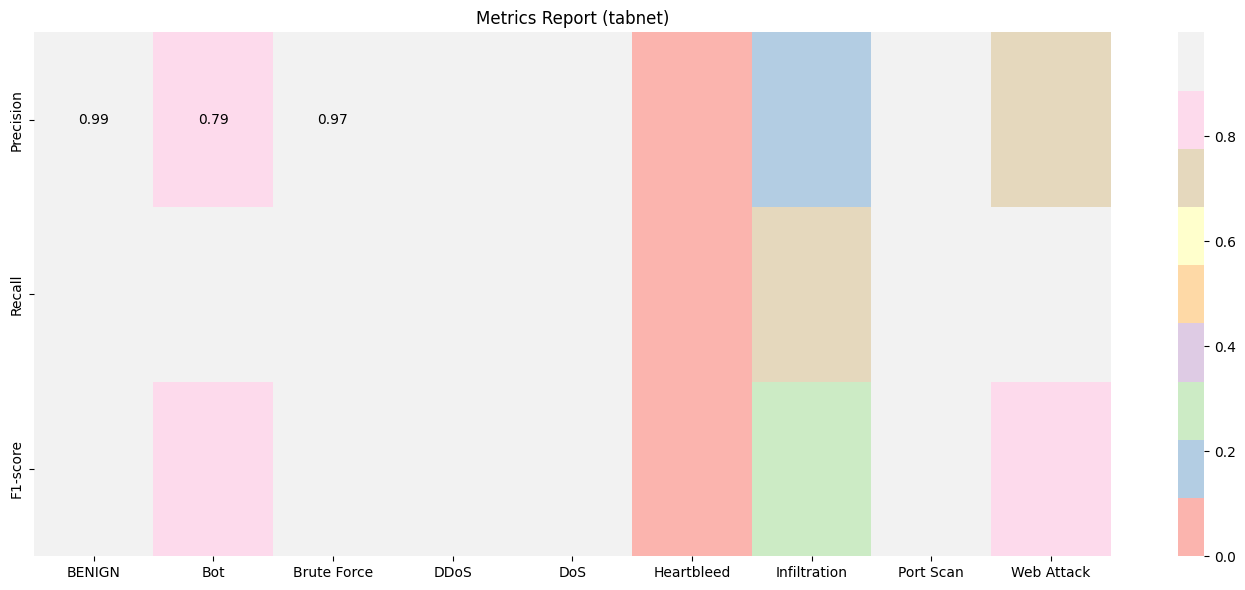

In [6]:
tabnet_pl = TTPipeline(tabnet)
tabnet_pl.train(X_train, y_train, X_test, y_test, augmentation=True)
tabnet_results = tabnet_pl.evaluate(X_test, y_test)
tabnet.save()

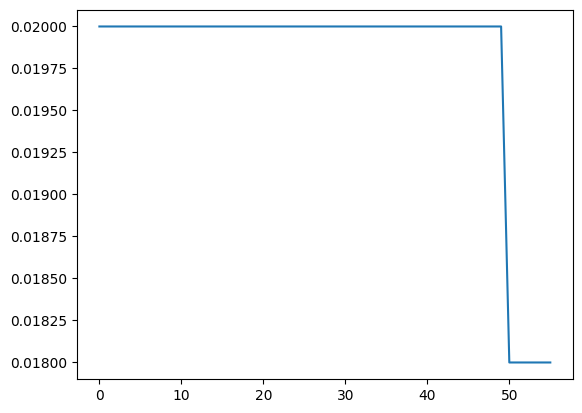

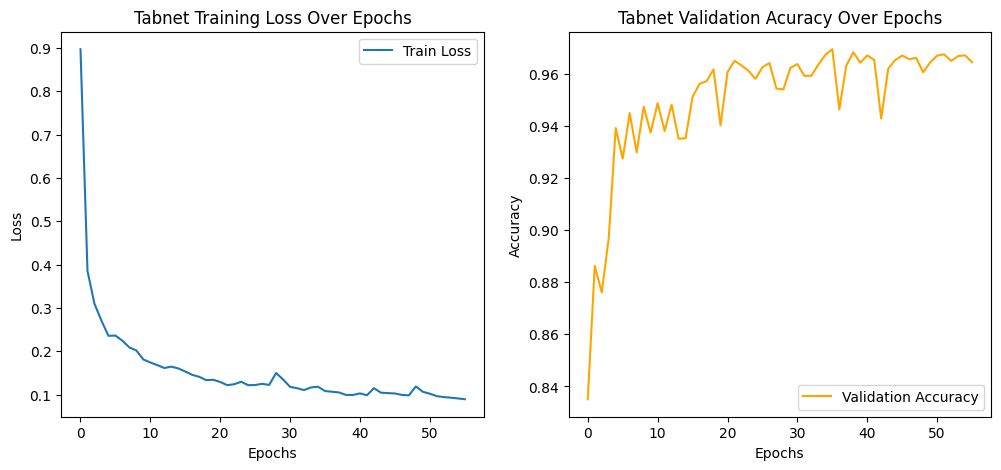

0.9693808281825003

In [8]:
tabnet.plot_metrics()
tabnet_results["accuracy"]

2025-04-06 22:37:45,827 - INFO - Fitting TabPNF model...
2025-04-06 22:37:45,828 - INFO - Training base TabPFN model
2025-04-06 22:37:45,891 - INFO - TabPFN predicting labels...
2025-04-06 22:38:03,134 - INFO - Saving model...
2025-04-06 22:38:03,177 - INFO - Model and components saved to models\tabpfn\tabpnf.zip


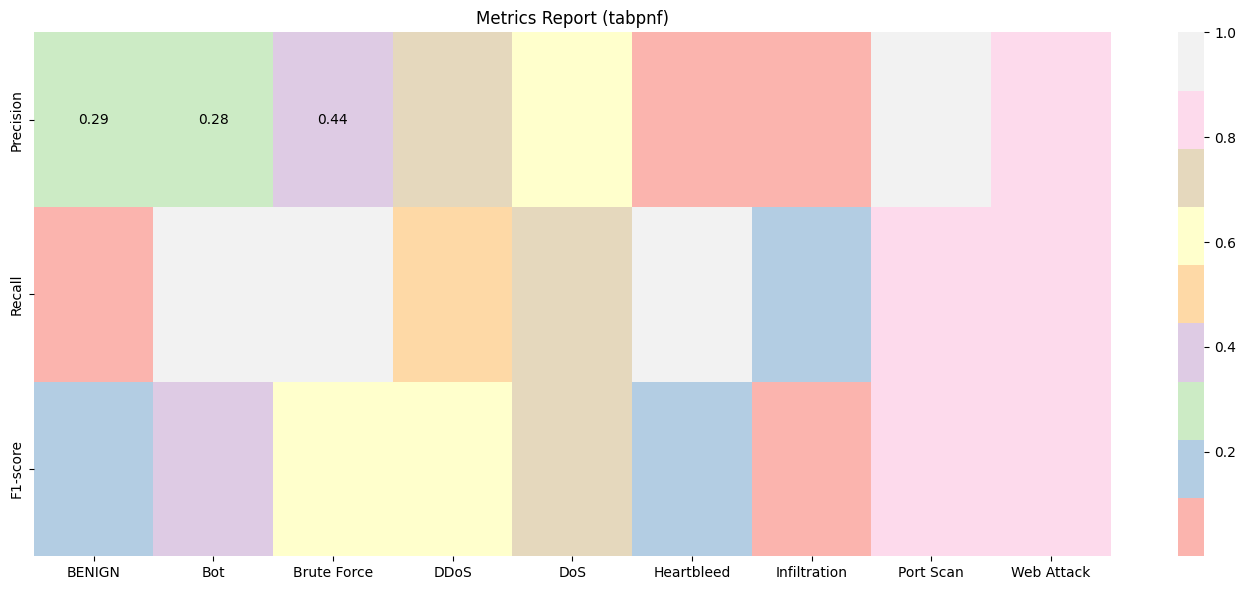

In [13]:
tabpfn_pl = TTPipeline(tabpfn)
smaller_train = balanced_sample(train, "Label", 5)
new_x = smaller_train.drop(columns=["Label"]).values
new_y = smaller_train["Label"].values
tabpfn_pl.train(new_x, new_y)
tabpfn_results = tabpfn_pl.evaluate(X_test, y_test)
tabpfn.save()

In [14]:
tabpfn_results["accuracy"]

0.5968058880274394

#### From loaded

In [ ]:
logreg.load()
logreg_pl = TTPipeline(logreg)
logreg_results = logreg_pl.evaluate(X_test, y_test)
logreg_results["accuracy"]

In [ ]:
svc.load()
svc_pl = TTPipeline(svc)
svc_results = svc_pl.evaluate(X_test, y_test)
svc_results["accuracy"]

In [ ]:
randomforest.load()
randomforest_pl = TTPipeline(randomforest)
randomforest_results = randomforest_pl.evaluate(X_test, y_test)
randomforest_results["accuracy"]

In [ ]:
kneighbors.load()
kneighbors_pl = TTPipeline(kneighbors)
kneighbors_results = kneighbors_pl.evaluate(X_test, y_test)
kneighbors_results["accuracy"]

In [ ]:
decision_tree.load()
decision_tree_pl = TTPipeline(decision_tree)
decision_tree_results = decision_tree_pl.evaluate(X_test, y_test)
decision_tree_results["accuracy"]

In [ ]:
tabnet.load()
tabnet_pl = TTPipeline(tabnet)
tabnet_results = tabnet_pl.evaluate(X_test, y_test)
tabnet_results["accuracy"]

In [ ]:
tabpfn.load()
tabpfn_pl = TTPipeline(tabpfn)
tabpfn_results = tabpfn_pl.evaluate(X_test, y_test)
tabnet_results["accuracy"]

In [ ]:
tabpfn.load()
tabpfn_pl = TTPipeline(tabpfn)
tabpfn_results = tabpfn_pl.evaluate(X_test, y_test)
tabpfn_results["accuracy"]

#### Performance

In [15]:
accuracies = [
    logreg_results["accuracy"],
    svc_results["accuracy"],
    randomforest_results["accuracy"],
    kneighbors_results["accuracy"],
    decision_tree_results["accuracy"],
    tabnet_results["accuracy"],
    tabpfn_results["accuracy"]
]

models_names = ['Logistic Regression', 'SVM', "Random Forest", "KNeighbors", "Decision Tree", "TabNet", "TabPFN"]

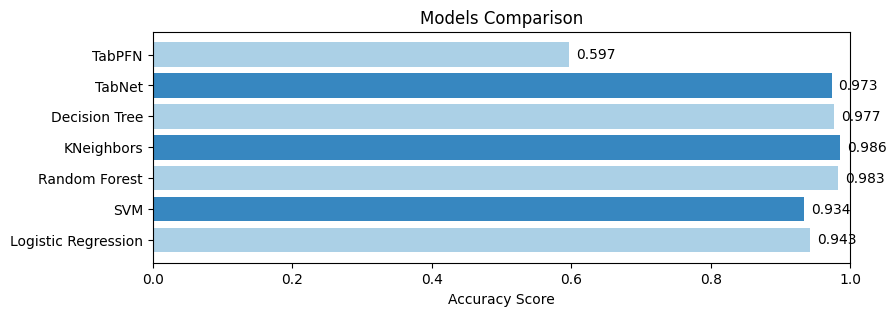

In [16]:
accuracy_plot = plot_accuracies(accuracies, models_names)